In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

### **Data Cleaning and Preprocessing**
**Check for Missing Values**:
 - Identify and handle missing or incomplete data entries in the dataset.
 - Use imputation methods (e.g., mean, median) or interpolation for time-series gaps.


In [8]:
d=pd.read_csv('Dhaka_PM2.5_2016.csv')
df=d[d['QC Name']!='Missing'].copy()
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
1441,01/03/2016 02:00,2,-999.0,196,ug/m3,-999,NaN,Valid
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid
...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid


There is two row don't have **AQI** and **NowCast Conc.** value but have **Raw Concentration**. Averaging AQI and NowCast Conc. for the same Raw Concentration and put those values in those invalid AQI and NowCast Conc. values.

In [22]:
aqi_196=df[(df['Raw Conc.']==196) & (df['AQI']>0)]['AQI'].mean().round()
aqi_26=df[(df['Raw Conc.']==26) & (df['AQI']>0)]['AQI'].mean().round()
nc_196=df[(df['Raw Conc.']==196) & (df['NowCast Conc.']>0)]['NowCast Conc.'].mean().round()
nc_26=df[(df['Raw Conc.']==26) & (df['NowCast Conc.']>0)]['NowCast Conc.'].mean().round()

In [30]:
df.loc[((df['Raw Conc.']==196) & (df['AQI']<0)),'AQI']=aqi_196
df.loc[((df['Raw Conc.']==26) & (df['AQI']<0)),'AQI']=aqi_26
df.loc[((df['Raw Conc.']==196) & (df['NowCast Conc.']<0)),'NowCast Conc.']=nc_196
df.loc[((df['Raw Conc.']==26) & (df['NowCast Conc.']<0)),'NowCast Conc.']=nc_26
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid
...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid


In [32]:
def cat(x):
    if x<=25:
        return 'Good'
    elif x<=100:
        return 'Moderate'
    elif x<=150:
        return 'Unhealthy for Sensitive Groups'
    elif x<=200:
        return 'Unhealthy'
    elif x<=300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
df['AQI Category']=df['AQI'].apply(cat)
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid
...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid


In [34]:
df.describe()

,Hour,NowCast Conc.,Raw Conc.,AQI
count,7325.000000,7325.000000,7325.000000,7325.000000
mean,11.507440,67.827345,67.852287,136.157270
std,6.923973,55.071697,57.419450,55.508329
min,0.000000,6.600000,5.000000,28.000000
25%,6.000000,31.700000,30.000000,92.000000
50%,12.000000,48.200000,48.000000,132.000000
75%,18.000000,81.900000,82.000000,165.000000
max,23.000000,364.900000,413.000000,411.000000



**Outlier Detection**:
 - Detect outliers in **AQI** values using statistical methods (IQR, Z-scores).
 - Analyze whether these outliers represent measurement errors or extreme pollution events.


In [42]:
q1=np.percentile(df['AQI'],25)
q3=np.percentile(df['AQI'],75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

out=df[(df['AQI']<lb) | (df['AQI']>ub)]['AQI'].count()
print('Number of outlier is: ',out)

Number of outlier is:  174


In [44]:
ex=df[df['AQI']>300]['AQI'].count()
print('Number of extreme events',ex)

Number of extreme events 103


In [46]:
df['z_AQI']=zscore(df['AQI'])
#d[d['z_AQI']>3]['z_AQI'].count()
df

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI
1441,01/03/2016 02:00,2,192.0,196,ug/m3,242,Very Unhealthy,Valid,1.906920
1442,01/03/2016 03:00,3,251.4,289,ug/m3,302,Hazardous,Valid,2.987913
1443,01/03/2016 04:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid,2.879814
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid,3.204111
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid,3.077996
...,...,...,...,...,...,...,...,...,...
8779,31/12/2016 20:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid,2.411383
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid,3.077996
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid,3.168078
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid,3.690558


In [70]:
df[abs(df['z_AQI'])>3]

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI
1444,01/03/2016 05:00,5,264.0,290,ug/m3,314,Hazardous,Valid,3.204111
1445,01/03/2016 06:00,6,256.8,245,ug/m3,307,Hazardous,Valid,3.077996
1466,02/03/2016 03:00,3,257.6,272,ug/m3,308,Hazardous,Valid,3.096012
1467,02/03/2016 04:00,4,292.3,327,ug/m3,342,Hazardous,Valid,3.708575
1468,02/03/2016 05:00,5,301.1,310,ug/m3,351,Hazardous,Valid,3.870724
...,...,...,...,...,...,...,...,...,...
8746,30/12/2016 11:00,11,272.4,310,ug/m3,323,Hazardous,Valid,3.366260
8780,31/12/2016 21:00,21,256.4,293,ug/m3,307,Hazardous,Valid,3.077996
8781,31/12/2016 22:00,22,261.7,267,ug/m3,312,Hazardous,Valid,3.168078
8782,31/12/2016 23:00,23,291.3,321,ug/m3,341,Hazardous,Valid,3.690558


**Feature Engineering**:
 - Create new DataFrame such as daily averages, AQI categories, or pollutant ratios with date and categorize the Daily Avg AQI

In [94]:
df['Date (LT)']=pd.to_datetime(df['Date (LT)'],format='%d/%m/%Y %H:%M')
df['date']=df['Date (LT)'].dt.date
col=['Date','Daily Avg NowCast Conc.','Daily Avg Raw Conc.','Daily Avg AQI']
av=df.groupby('date').agg({'NowCast Conc.':'mean','Raw Conc.':'mean','AQI':'mean'}).reset_index()
av.columns=col
av

,Date,Daily Avg NowCast Conc.,Daily Avg Raw Conc.,Daily Avg AQI
0,2016-03-01,188.086364,188.863636,242.772727
1,2016-03-02,169.825000,165.041667,234.708333
2,2016-03-03,180.070833,179.291667,243.416667
3,2016-03-04,89.145833,93.583333,170.958333
4,2016-03-05,128.129167,122.833333,190.625000
...,...,...,...,...
302,2016-12-28,146.645833,147.625000,203.416667
303,2016-12-29,158.725000,156.791667,212.541667
304,2016-12-30,167.816667,169.166667,223.833333
305,2016-12-31,191.400000,197.458333,242.083333


In [96]:
def cat(x):
    if x<=25:
        return 'Good'
    elif x<=100:
        return 'Moderate'
    elif x<=150:
        return 'Unhealthy for Sensitive Groups'
    elif x<=200:
        return 'Unhealthy'
    elif x<=300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'
av['Daily Avg AQI Category']=av['Daily Avg AQI'].apply(cat)
av

,Date,Daily Avg NowCast Conc.,Daily Avg Raw Conc.,Daily Avg AQI,Daily Avg AQI Category
0,2016-03-01,188.086364,188.863636,242.772727,Very Unhealthy
1,2016-03-02,169.825000,165.041667,234.708333,Very Unhealthy
2,2016-03-03,180.070833,179.291667,243.416667,Very Unhealthy
3,2016-03-04,89.145833,93.583333,170.958333,Unhealthy
4,2016-03-05,128.129167,122.833333,190.625000,Unhealthy
...,...,...,...,...,...
302,2016-12-28,146.645833,147.625000,203.416667,Very Unhealthy
303,2016-12-29,158.725000,156.791667,212.541667,Very Unhealthy
304,2016-12-30,167.816667,169.166667,223.833333,Very Unhealthy
305,2016-12-31,191.400000,197.458333,242.083333,Very Unhealthy


In [108]:
###Pridiction
x=np.arange(len(av['Daily Avg AQI']))
y=av['Daily Avg AQI'].to_frame()
model= LinearRegression()
model.fit(y,x)
#model.fit(av['index'],av['Daily Avg AQI'])
av['AQI Prediction']=model.predict(y)
print(f"Intercept: {model.intercept_}, Coefficient: {model.coef_[0]}")

Intercept: 89.00510076023619, Coefficient: 0.46796698567228695


In [501]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
y_poly = poly.fit_transform(y)
model_poly = LinearRegression()
model_poly.fit(y_poly, x)
av['Predicted AQI (Poly)'] = model_poly.predict(y_poly)


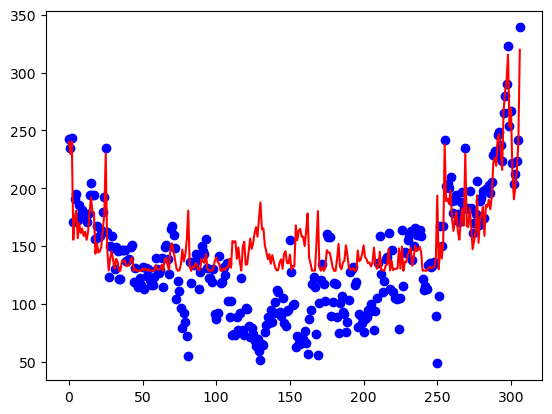

In [503]:
plt.scatter(av['index'], av['Daily Avg AQI'], color='blue', label='Actual AQI')

#sns.regplot(x='index', y='Daily Avg AQI', data=av, scatter=True, line_kws={'color': 'red'})
plt.plot(av['index'], av['Predicted AQI (Poly)'], color='red', label='Prediction Line')
#plt.xlabel('Index')
#plt.ylabel('Daily Avg AQI')
#plt.title('Linear Regression for AQI Prediction Based on Index')
#plt.legend()
#plt.show()

In [34]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df['AQI_L']=le.fit_transform(df['AQI_avg Category'])

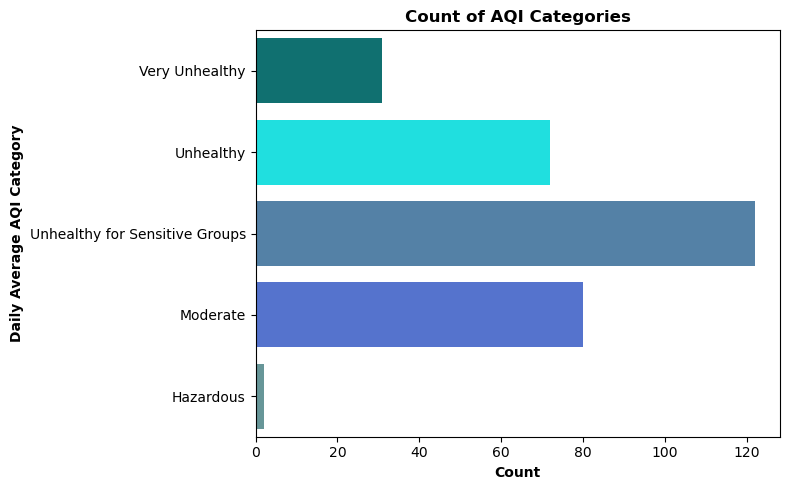

In [505]:
plt.figure(figsize = (8,5))
colors =  ['teal', 'aqua', 'steelblue', 'royalblue', 'cadetblue']
sns.countplot(y=av['Daily Avg AQI Category'],hue=av['Daily Avg AQI Category'], palette=colors)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Daily Average AQI Category', fontweight = 'bold')
plt.title('Count of AQI Categories', fontweight = 'bold' )
#plt.xticks(rotation=60)
#plt.grid(True)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

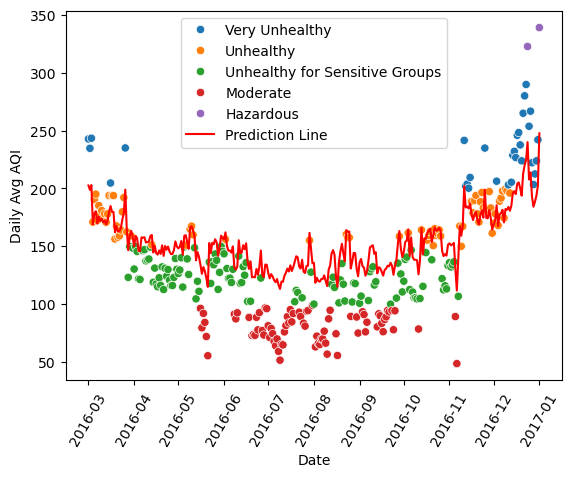

In [533]:
sns.scatterplot(x='Date', y='Daily Avg AQI', hue=av['Daily Avg AQI Category'], data=av)
sns.lineplot(x='Date', y='AQI Prediction', data=av, label='Prediction Line', color='red')
plt.xticks(rotation=60)

plt.show

### **Exploratory Data Analysis (EDA)**
4. **Yearly and Monthly Trends**:
   - Analyze how air quality levels (e.g., PM2.5) have changed year over year.
   - Break down trends by month to understand seasonal variations.

5. **Diurnal Patterns**:
   - Examine how pollution levels change during the day (morning, afternoon, evening, night).

In [85]:
import matplotlib.pyplot as plt

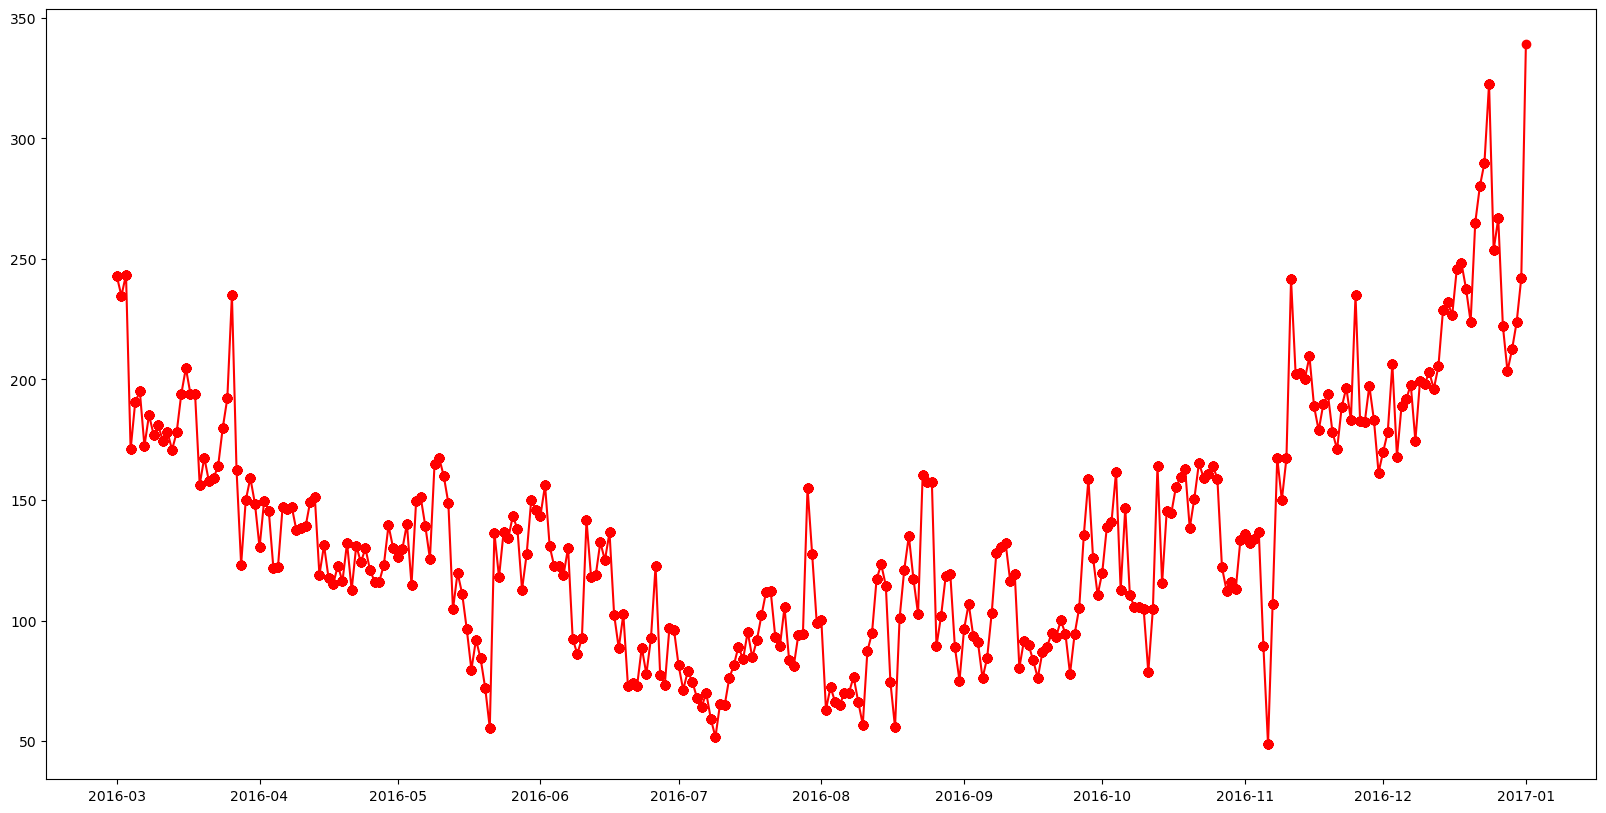

In [129]:
plt.figure(figsize=(20,10))
plt.plot(df['date'],df['AQI_avg'],marker='o',label='Daily Average AQI',color='red')
plt.show()

In [144]:
def t_cat(x):
    if x>=6 and x<12:
        return 'Morning'
    elif x>=12 and x<18:
        return 'After Noon'
    elif x>=18 and x<21:
        return 'Evening'
    else:
        return 'Night'

df['Time Period']=df['Hour'].apply(t_cat)


,Unnamed: 0,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI,date,NowCast Conc._avg,Raw Conc._avg,AQI_avg,AQI_avg Category,AQI_L,Time Period
0,1442,2016-03-01 03:00:00,3,251.4,289,ug/m3,302,Hazardous,Valid,2.990346,2016-03-01,187.9,188.523810,242.809524,Very Unhealthy,4,Night
1,1443,2016-03-01 04:00:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid,2.882196,2016-03-01,187.9,188.523810,242.809524,Very Unhealthy,4,Night
2,1444,2016-03-01 05:00:00,5,264.0,290,ug/m3,314,Hazardous,Valid,3.206645,2016-03-01,187.9,188.523810,242.809524,Very Unhealthy,4,Night
3,1445,2016-03-01 06:00:00,6,256.8,245,ug/m3,307,Hazardous,Valid,3.080470,2016-03-01,187.9,188.523810,242.809524,Very Unhealthy,4,Morning
4,1446,2016-03-01 07:00:00,7,238.2,205,ug/m3,288,Very Unhealthy,Valid,2.737996,2016-03-01,187.9,188.523810,242.809524,Very Unhealthy,4,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,8779,2016-12-31 20:00:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid,2.413546,2016-12-31,191.4,197.458333,242.083333,Very Unhealthy,4,Evening
7333,8780,2016-12-31 21:00:00,21,256.4,293,ug/m3,307,Hazardous,Valid,3.080470,2016-12-31,191.4,197.458333,242.083333,Very Unhealthy,4,Night
7334,8781,2016-12-31 22:00:00,22,261.7,267,ug/m3,312,Hazardous,Valid,3.170595,2016-12-31,191.4,197.458333,242.083333,Very Unhealthy,4,Night
7335,8782,2016-12-31 23:00:00,23,291.3,321,ug/m3,341,Hazardous,Valid,3.693320,2016-12-31,191.4,197.458333,242.083333,Very Unhealthy,4,Night


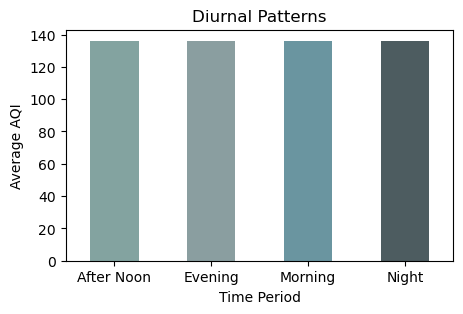

In [603]:
avp=df.groupby(df['Time Period'])['AQI_avg'].mean()
plt.figure(figsize=(5,3))
avp.plot(kind='bar', color=['#83a3a0','#8a9ea0','#6a95a0','#4d5c60'])
plt.xticks(rotation=0)
plt.xlabel('Time Period')
plt.ylabel('Average AQI')
plt.title('Diurnal Patterns')
plt.show()

6. **Seasonal Insights**:
   - Compare pollution levels across seasons (winter, summer, monsoon).


In [605]:
def sn(x):
    if x>=3 and x<=5:
        return 'Summer'
    elif x>5 and x<=9:
        return 'Monsoon'
    elif x>9 and x<=11:
        return 'Autum'
    elif x>5 and x<=9:
        return 'Monsoon'
    else:
        return 'Winter'
df['Season']=df['Date (LT)'].dt.month.apply(sn)
df

,Unnamed: 0,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI,...,NowCast Conc._avg,Raw Conc._avg,AQI_avg,AQI_avg Category,AQI_L,Time Period,Season,Std_AQI,days,month
0,1442,2016-03-01 03:00:00,3,251.4,289,ug/m3,302,Hazardous,Valid,2.990346,...,187.9,188.523810,242.809524,Very Unhealthy,4,Night,Summer,45,0,3
1,1443,2016-03-01 04:00:00,4,246.0,240,ug/m3,296,Very Unhealthy,Valid,2.882196,...,187.9,188.523810,242.809524,Very Unhealthy,4,Night,Summer,45,0,3
2,1444,2016-03-01 05:00:00,5,264.0,290,ug/m3,314,Hazardous,Valid,3.206645,...,187.9,188.523810,242.809524,Very Unhealthy,4,Night,Summer,45,0,3
3,1445,2016-03-01 06:00:00,6,256.8,245,ug/m3,307,Hazardous,Valid,3.080470,...,187.9,188.523810,242.809524,Very Unhealthy,4,Morning,Summer,45,0,3
4,1446,2016-03-01 07:00:00,7,238.2,205,ug/m3,288,Very Unhealthy,Valid,2.737996,...,187.9,188.523810,242.809524,Very Unhealthy,4,Morning,Summer,45,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,8779,2016-12-31 20:00:00,20,219.8,243,ug/m3,270,Very Unhealthy,Valid,2.413546,...,191.4,197.458333,242.083333,Very Unhealthy,4,Evening,Winter,45,305,12
7333,8780,2016-12-31 21:00:00,21,256.4,293,ug/m3,307,Hazardous,Valid,3.080470,...,191.4,197.458333,242.083333,Very Unhealthy,4,Night,Winter,45,305,12
7334,8781,2016-12-31 22:00:00,22,261.7,267,ug/m3,312,Hazardous,Valid,3.170595,...,191.4,197.458333,242.083333,Very Unhealthy,4,Night,Winter,45,305,12
7335,8782,2016-12-31 23:00:00,23,291.3,321,ug/m3,341,Hazardous,Valid,3.693320,...,191.4,197.458333,242.083333,Very Unhealthy,4,Night,Winter,45,305,12


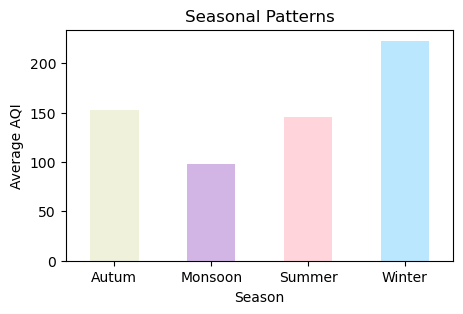

In [635]:
aqi_s=df.groupby(df['Season'])['AQI_avg'].mean()
plt.figure(figsize=(5,3))
aqi_s.plot(kind='bar', color=['#eff1db','#d3b5e5','#ffd4db','#bbe7fe'])
plt.xticks(rotation=0)
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.title('Seasonal Patterns')
plt.savefig('example_plot.png', format='png', dpi=300)
plt.show()


### **Comparative Analysis**
7. **Weekday vs. Weekend Pollution**:
   - Study differences in air quality between weekdays and weekends.

In [277]:
w=df[df['Date (LT)'].dt.weekday<5]['date']
w2=df[df['Date (LT)'].dt.weekday>=5]['date']

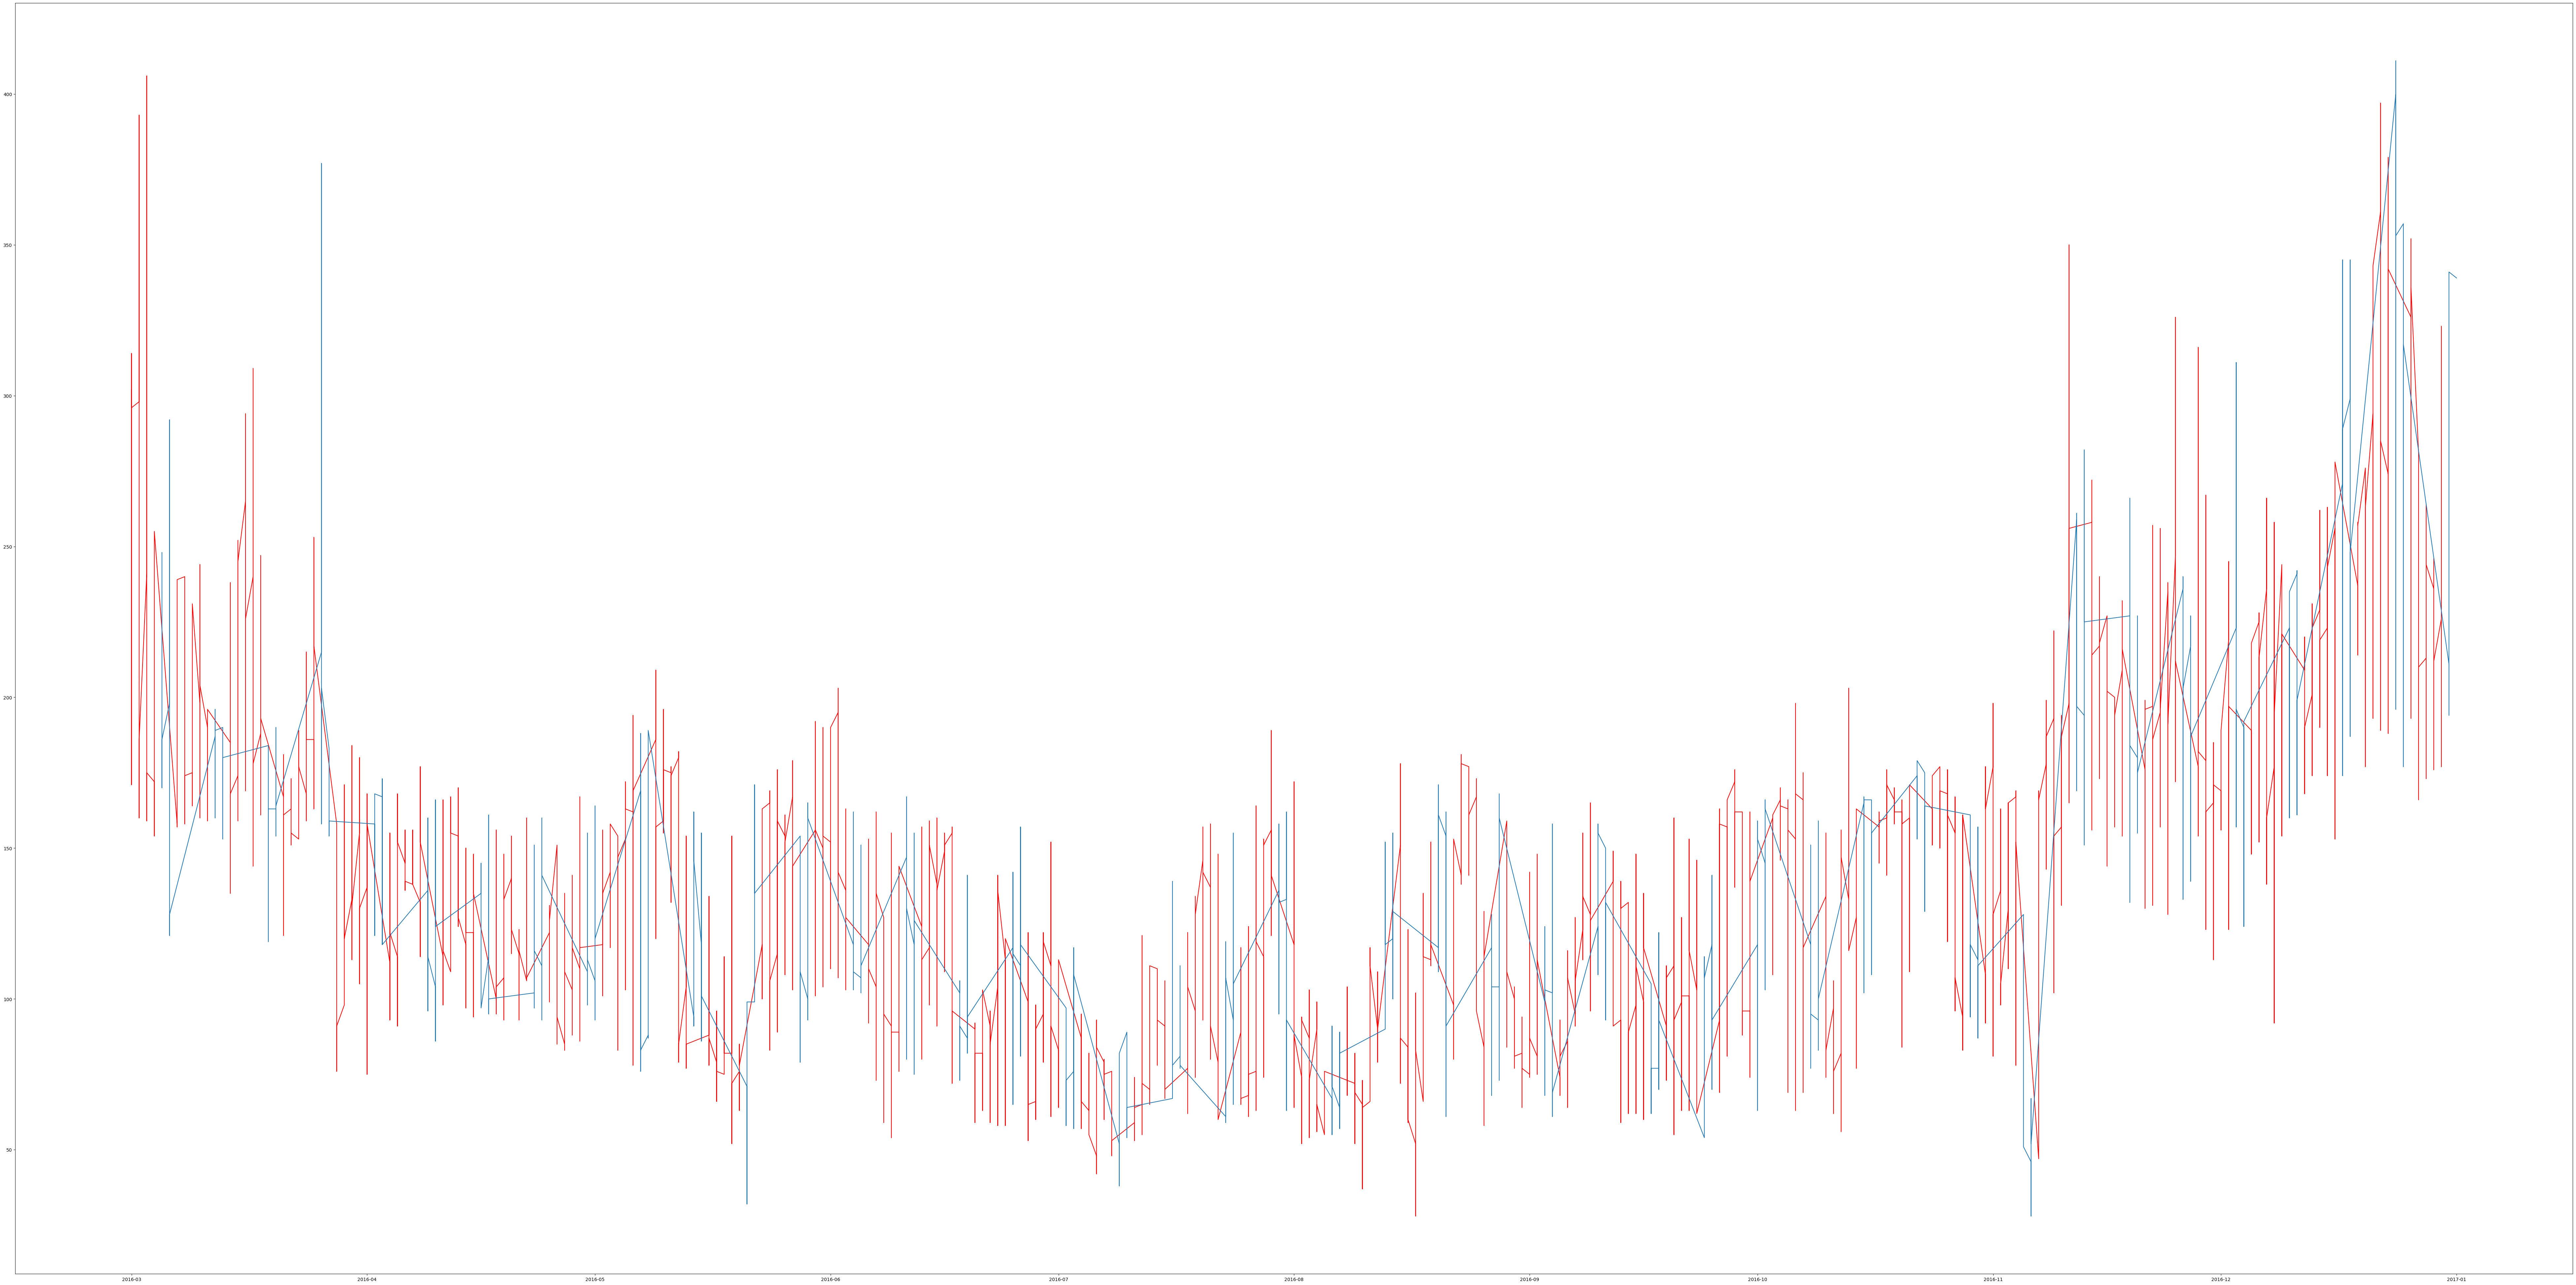

In [607]:
wday=df[df['Date (LT)'].dt.weekday<5]['AQI']
nwd=df[df['Date (LT)'].dt.weekday>=5]['AQI']
plt.figure(figsize=(100,50))
plt.plot(w,wday,color='red')
plt.plot(w2,nwd)
plt.show()

8. **Event-Based Analysis**:
   - Identify and analyze specific high-pollution events, such as holidays or industrial activities.

In [397]:
ds=df[(df['AQI_avg Category']=='Hazardous') & (df['Date (LT)'].dt.weekday>=5)]
#ds.drop('Std_AQI',axis=1)
ds

,Unnamed: 0,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,z_AQI,date,NowCast Conc._avg,Raw Conc._avg,AQI_avg,AQI_avg Category,AQI_L,Time Period,Season
7144,8591,2016-12-24 00:00:00,0,349.9,408,ug/m3,400,Hazardous,Valid,4.756795,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Night,Winter
7145,8592,2016-12-24 01:00:00,1,334.9,320,ug/m3,385,Hazardous,Valid,4.486420,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Night,Winter
7146,8593,2016-12-24 02:00:00,2,308.5,282,ug/m3,358,Hazardous,Valid,3.999745,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Night,Winter
7147,8594,2016-12-24 03:00:00,3,337.7,367,ug/m3,387,Hazardous,Valid,4.522470,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Night,Winter
7148,8595,2016-12-24 04:00:00,4,334.9,332,ug/m3,385,Hazardous,Valid,4.486420,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Night,Winter
7149,8596,2016-12-24 05:00:00,5,324.5,314,ug/m3,374,Hazardous,Valid,4.288145,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Night,Winter
7150,8597,2016-12-24 06:00:00,6,364.9,413,ug/m3,411,Hazardous,Valid,4.955070,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Morning,Winter
7151,8598,2016-12-24 07:00:00,7,358.1,350,ug/m3,406,Hazardous,Valid,4.864945,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Morning,Winter
7152,8599,2016-12-24 08:00:00,8,361.3,365,ug/m3,408,Hazardous,Valid,4.900995,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Morning,Winter
7153,8600,2016-12-24 09:00:00,9,331.3,280,ug/m3,381,Hazardous,Valid,4.414320,2016-12-24,272.791667,273.125,322.666667,Hazardous,0,Morning,Winter


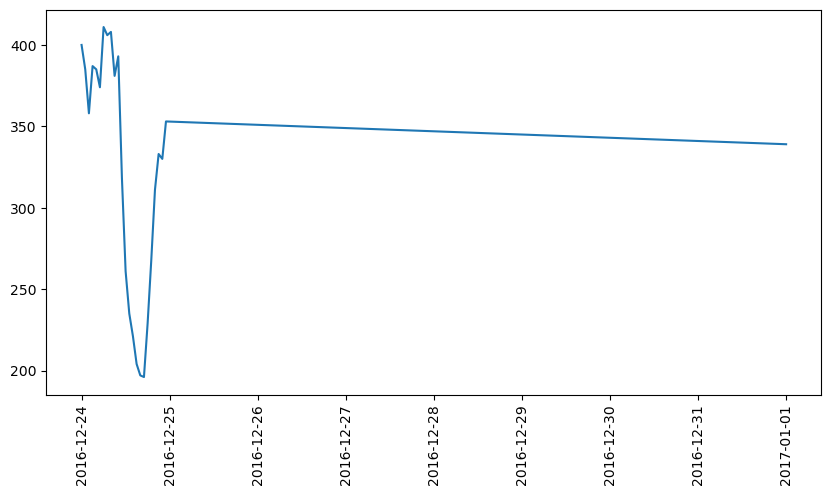

In [447]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(ds['Date (LT)'],ds['AQI'])
plt.show()


9. **Comparison with Standards**:
   - Compare Dhaka's PM2.5 levels with WHO guidelines and national air quality standards.

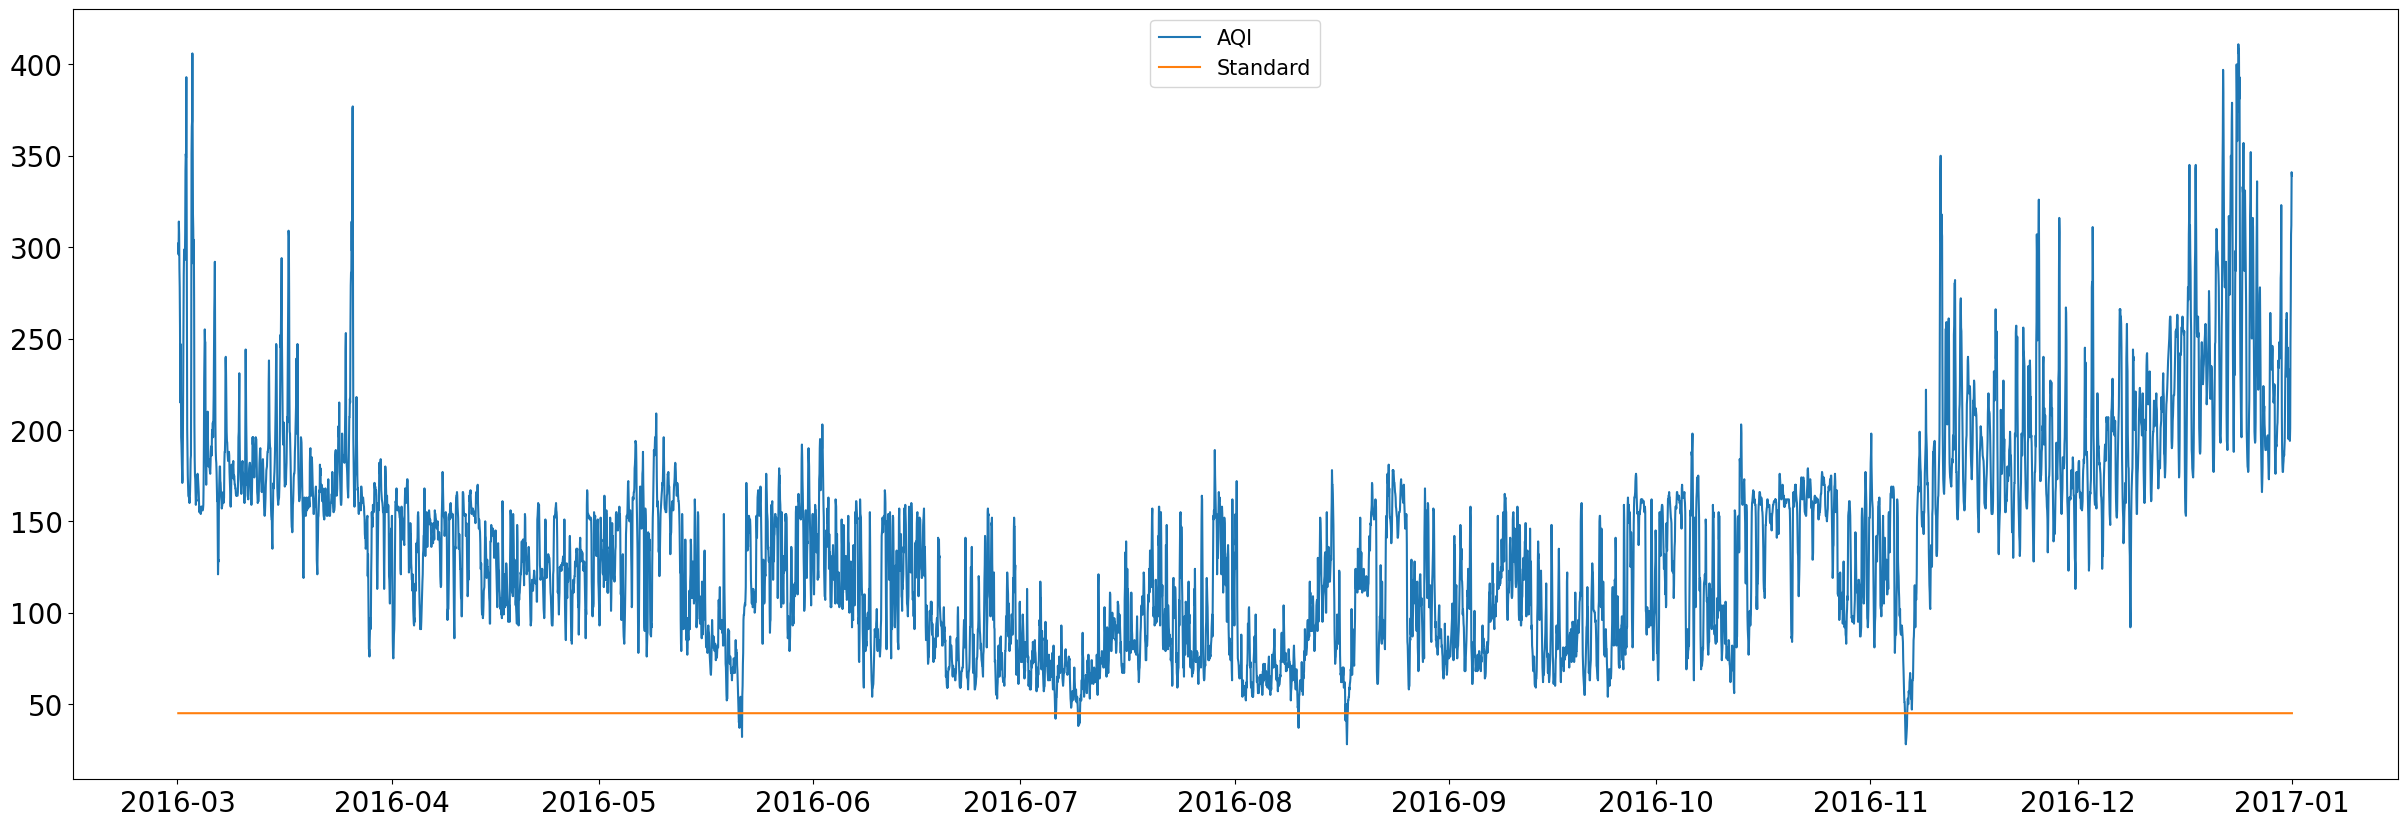

In [466]:
df['Std_AQI']=45
plt.figure(figsize=(30,10))
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
plt.plot(df['Date (LT)'],df['AQI'],label='AQI')
plt.plot(df['Date (LT)'],df['Std_AQI'],label='Standard')
plt.legend(fontsize=15)
plt.show()


### **Health and Policy Insights**
12. **Health Risk Assessment**:
    - Calculate the percentage of days with "unhealthy" or "hazardous" air quality levels.

In [445]:
p=(df[df['AQI_avg Category']=='Hazardous'].count()['AQI_avg Category']*100)/df['Date (LT)'].count()
print('percentage of days with "hazardous" air quality levels:', p)

percentage of days with "hazardous" air quality levels: 0.34073872154831675


15. **Time-Series Forecasting**:
    - Use historical data to predict future PM2.5 levels using models like ARIMA, LSTM, or linear regression.

In [563]:
from sklearn.linear_model import LinearRegression
df['days']=(df['Date (LT)']-df['Date (LT)'].min()).dt.days
train=df[:int(0.80*len(df['AQI']))].copy()
test=df[int(0.80*len(df['AQI'])):].copy()
model=LinearRegression()
model.fit(train[['days']],train['AQI'])
test['Predictions'] = model.predict(test[['days']])


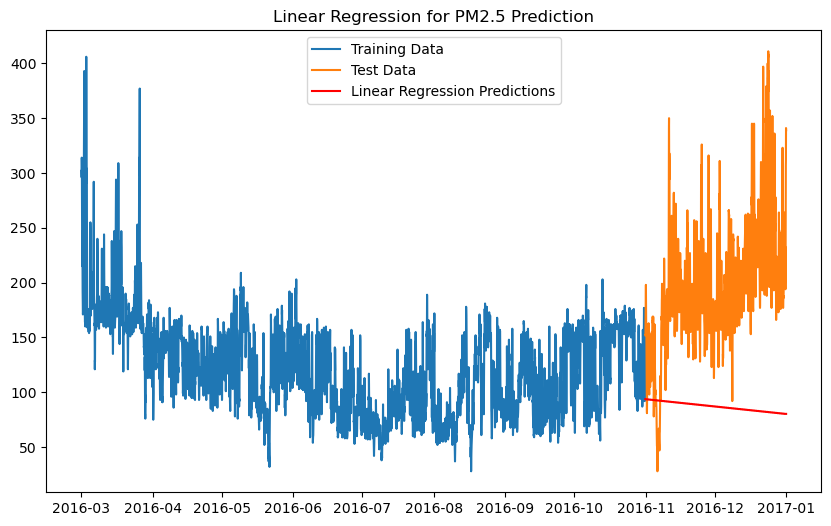

In [565]:
plt.figure(figsize=(10, 6))
plt.plot(train['Date (LT)'], train['AQI'], label='Training Data')
plt.plot(test['Date (LT)'], test['AQI'], label='Test Data')
plt.plot(test['Date (LT)'], test['Predictions'], label='Linear Regression Predictions', color='red')
plt.legend()
plt.title('Linear Regression for PM2.5 Prediction')
plt.show()

In [577]:
df['month'] = df['Date (LT)'].dt.month
from sklearn.linear_model import LinearRegression
train=df[:int(0.80*len(df['AQI_avg']))].copy()
test=df[int(0.80*len(df['AQI_avg'])):].copy()
model=LinearRegression()
model.fit(train[['month']],train['AQI_avg'])
test['Predictions'] = model.predict(test[['month']])

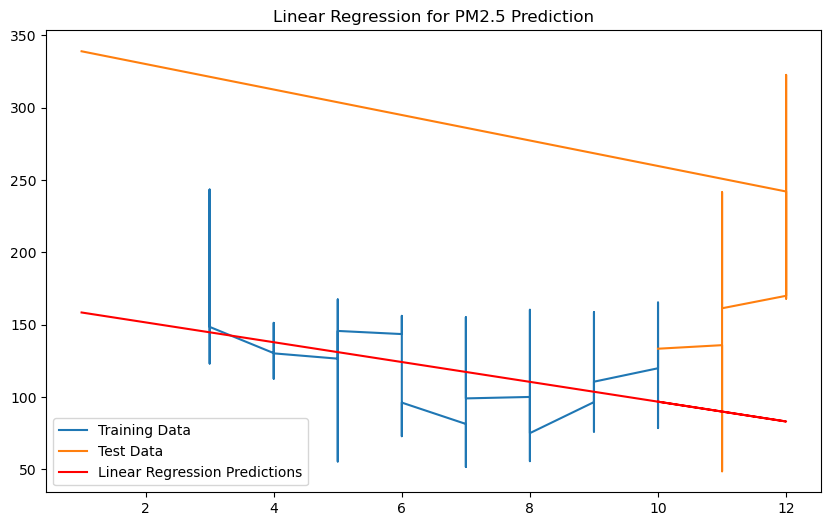

In [579]:
plt.figure(figsize=(10, 6))
plt.plot(train['month'], train['AQI_avg'], label='Training Data')
plt.plot(test['month'], test['AQI_avg'], label='Test Data')
plt.plot(test['month'], test['Predictions'], label='Linear Regression Predictions', color='red')
plt.legend()
plt.title('Linear Regression for PM2.5 Prediction')
plt.show()

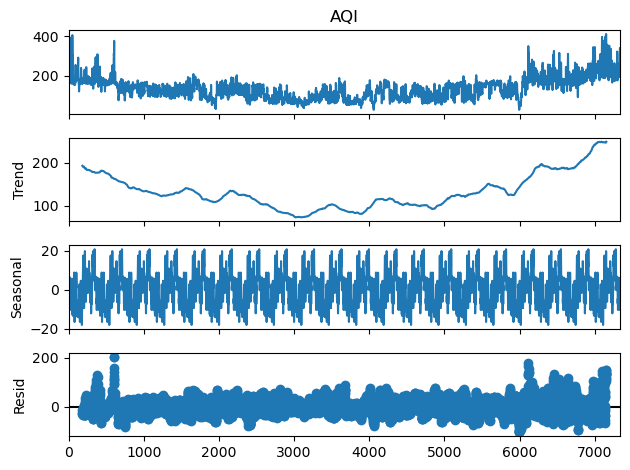

In [583]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['AQI'], model='additive', period=365)
decomposition.plot()
plt.show()

In [619]:


# Daily average of PM2.5
daily_pm25 = df['AQI'].resample('D').mean().dropna()

# Monthly average of PM2.5
monthly_pm25 = df['AQI'].resample('ME').mean().dropna()

In [623]:
monthly_pm25

Date (LT)
2016-03-31    181.570850
2016-04-30    130.788889
2016-05-31    125.025538
2016-06-30    106.920833
2016-07-31     87.157258
2016-08-31     97.428763
2016-09-30    102.295105
2016-10-31    134.587366
2016-11-30    171.166667
2016-12-31    222.670699
2017-01-31    339.000000
Freq: ME, Name: AQI, dtype: float64

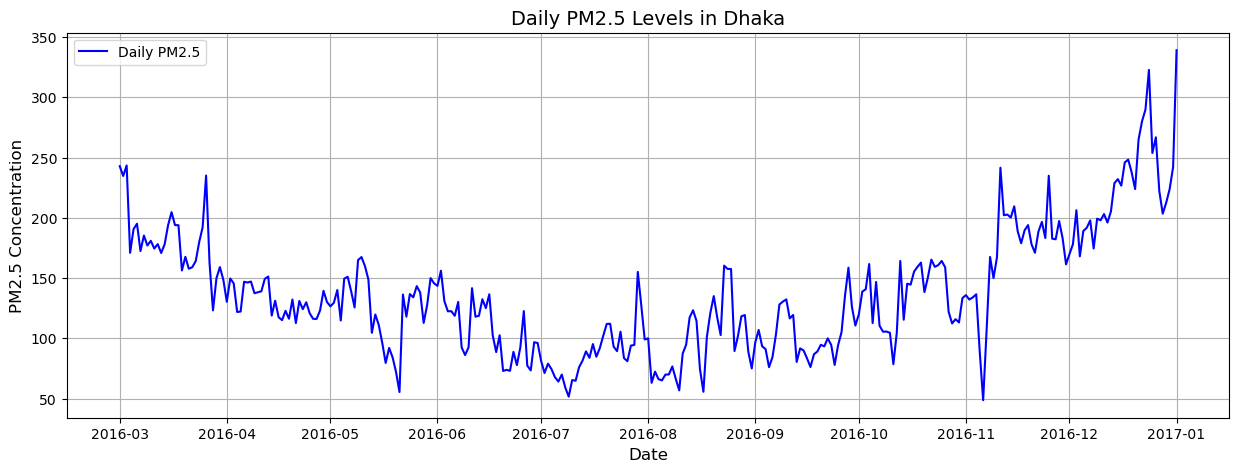

In [625]:
# Daily PM2.5 levels
plt.figure(figsize=(15, 5))
plt.plot(daily_pm25, label='Daily PM2.5', color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.title('Daily PM2.5 Levels in Dhaka', fontsize=14)
plt.legend()
plt.grid()
plt.show()



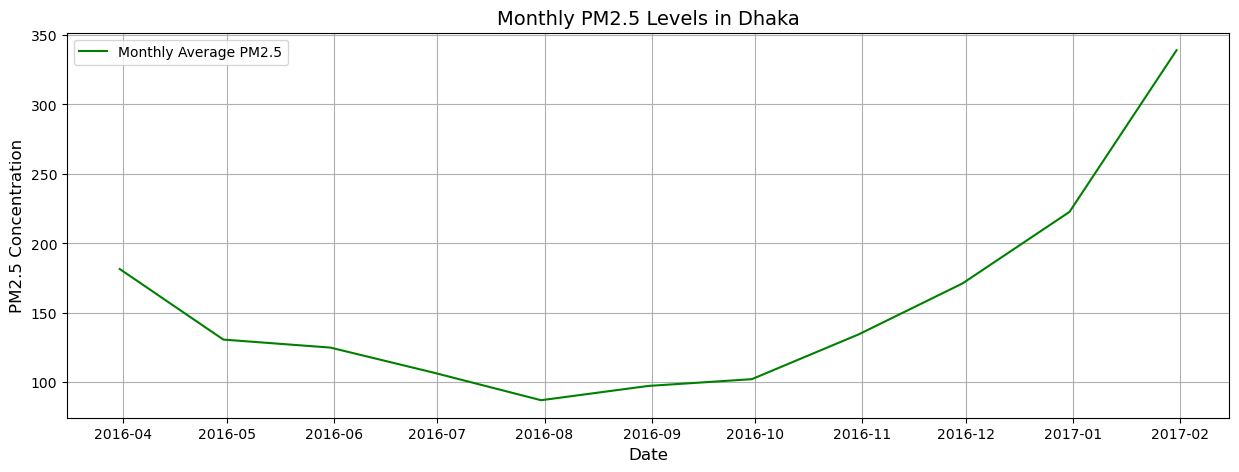

In [627]:
# Monthly PM2.5 levels
plt.figure(figsize=(15, 5))
plt.plot(monthly_pm25, label='Monthly Average PM2.5', color='green')
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.title('Monthly PM2.5 Levels in Dhaka', fontsize=14)
plt.legend()
plt.grid()
plt.show()

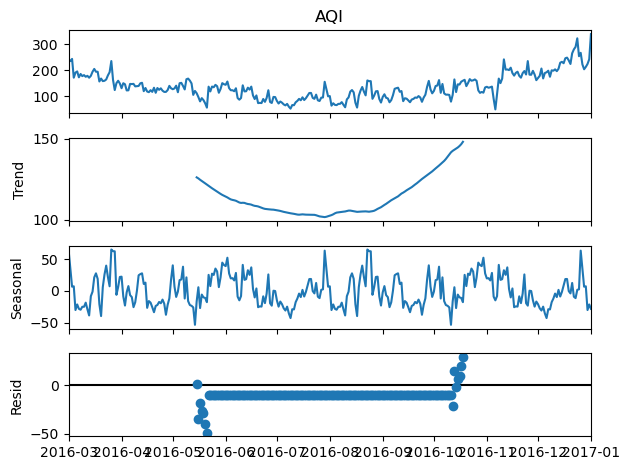

In [633]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose daily PM2.5 data
decomposition = seasonal_decompose(daily_pm25, model='additive', period=150)  # Assuming yearly seasonality

# Plot the components
decomposition.plot()
plt.show()
